<a href="https://colab.research.google.com/github/hyunsoo0821/-1-4-/blob/main/%EC%9D%B4%EC%8A%A4%ED%8A%B8%EC%86%8C%ED%94%84%ED%8A%B8_1%EB%B2%88%EC%A7%B8_%EC%A0%84%EB%85%84%EB%A7%90%EB%8C%80%EB%B9%84_%EC%A6%9D%EA%B0%90_%EC%A6%9D%EA%B0%90%EB%A5%A0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('지역별 소비유형별 개인 신용카드_25155456.csv',encoding="utf-8")

In [ ]:
import pandas as pd



# 날짜 컬럼만 추출 (2008/10 ~ 2025/07)
date_range = [col for col in df.columns if "2008/10" <= col <= "2025/07"]

# 원하는 CSI분류코드 필터링
target_codes = ["전국"]

# 원하는 변환 항목 필터링
target_transform = ["전년말대비증감", "전년말대비증감률"]
# 필터링
filtered_df = df[
    (df["지역코드"].isin(target_codes)) &
    (df["변환"].isin(target_transform))
][["지역코드", "변환"] + date_range]

In [ ]:
rate_df = df[
    (df['지역코드'] == '전국') &
    (df['변환'] == '전년말대비증감률')
].copy()

rate_df.set_index('변환', inplace=True)
rate_df = rate_df.loc['전년말대비증감률']
print(rate_df)


                               통계표 지역코드           소비유형코드  금액구분코드 단위 2009/12  \
변환                                                                            
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국               합계      총액  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국               합계  월간 일평균  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국             종합소매      총액  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국             종합소매  월간 일평균  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국              백화점      총액  %     NaN   
...                            ...  ...              ...     ... ..     ...   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국  공과금/개인 및 전문 서비스  월간 일평균  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국            금융/보험      총액  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국            금융/보험  월간 일평균  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국               기타      총액  %     NaN   
전년말대비증감률  7.5.2. 지역별 소비유형별 개인 신용카드   전국             

In [ ]:
filtered_df = df[
    (df['지역코드'] == '전국') &
    (df['변환'] == '전년말대비증감률') &
    (df['금액구분코드'] == '총액')
].copy()
growth_df = filtered_df.groupby('소비유형코드')[date_cols].mean()
growth_df['Growth_CAGR'] = growth_df.mean(axis=1)


/tmp/ipython-input-2320588926.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned = df[date_cols].applymap(lambda x: float(str(x).replace(',', '')) if pd.notnull(x) else None)
/tmp/ipython-input-2320588926.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned = df[date_cols].applymap(lambda x: float(str(x).replace(',', '')) if pd.notnull(x) else None)
/tmp/ipython-input-2320588926.py:84: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2320588926.py:84: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2320588926.py:84: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG})

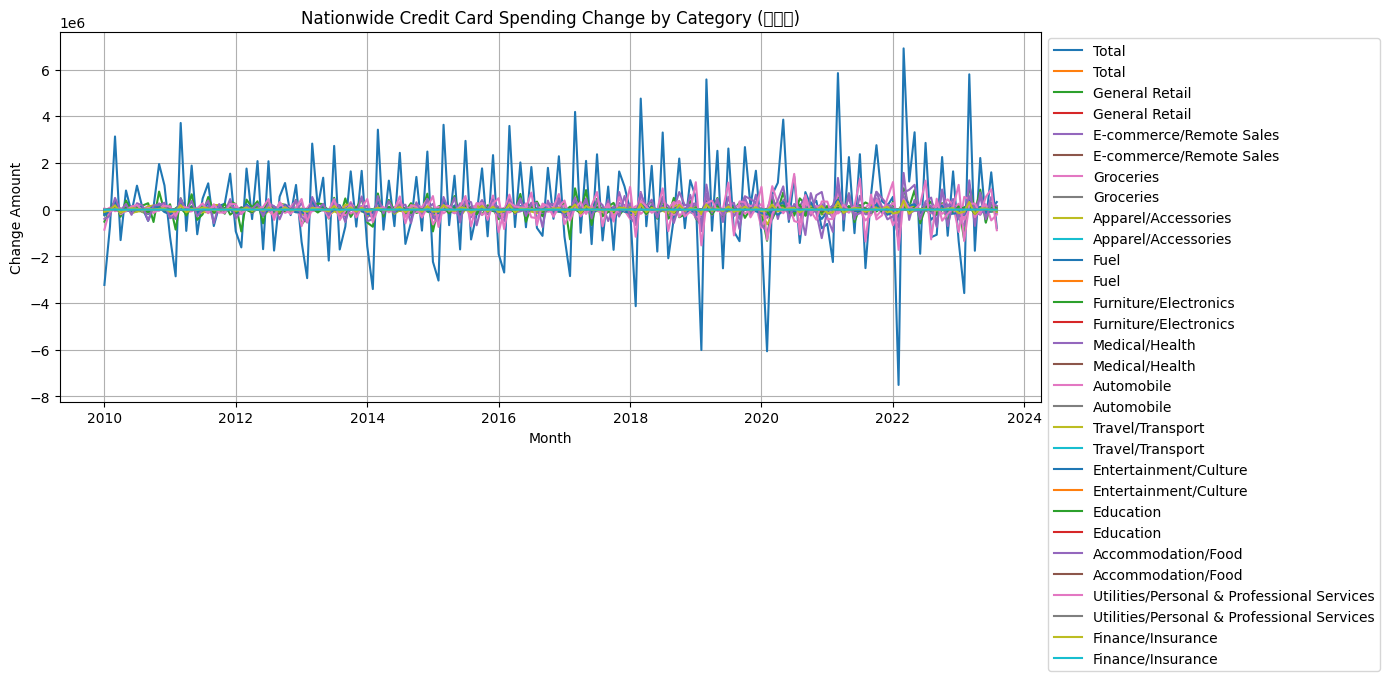

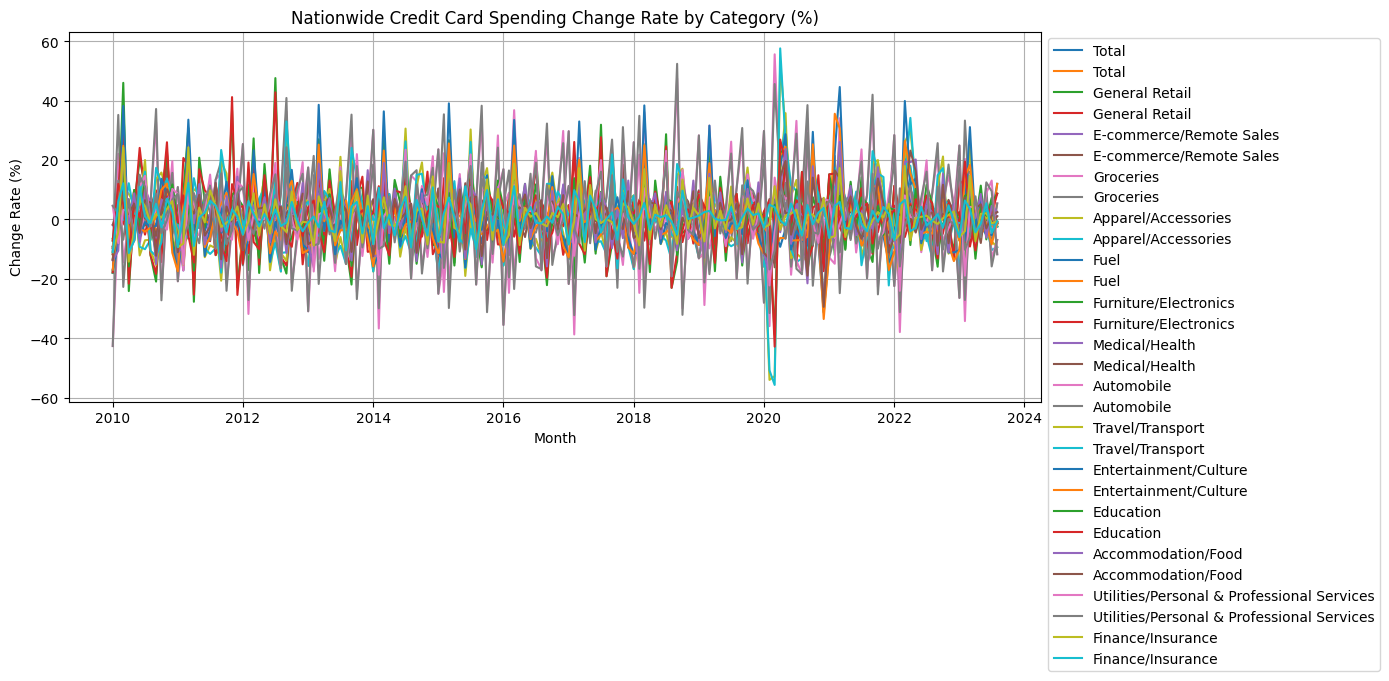

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 소비유형 매핑 딕셔너리
category_mapping = {
    "슈퍼마켓": "Supermarket",
    "오락/문화": "Entertainment/Culture",
    "자동차": "Automobile",
    "여행/교통": "Travel/Transport",
    "합계": "Total",
    "가전제품/정보통신기기": "Electronics/ICT",
    "서적/문구": "Books/Stationery",
    "숙박": "Accommodation",
    "여행사/자동차임대": "Travel Agency/Car Rental",
    "종합병원": "General Hospital",
    "일반병의원/기타의료기관": "Clinics/Other Medical",
    "의료/보건": "Medical/Health",
    "교육": "Education",
    "식료품": "Groceries",
    "가구/가전": "Furniture/Electronics",
    "시계/귀금속/안경": "Watches/Jewelry/Glasses",
    "화장품": "Cosmetics",
    "가구": "Furniture",
    "연료": "Fuel",
    "의복/직물": "Clothing/Textiles",
    "전자상거래/통신판매": "E-commerce/Remote Sales",
    "편의점": "Convenience Store",
    "자동차 부품 및 정비": "Auto Parts & Maintenance",
    "음식점": "Restaurant",
    "항공사": "Airlines",
    "의류/잡화": "Apparel/Accessories",
    "국산자동차신품": "Domestic New Cars",
    "기타운송수단": "Other Transport",
    "건강보조식품": "Health Supplements",
    "복식잡화": "Fashion Accessories",
    "대형마트/유통전문점": "Hypermarket/Retail",
    "종합소매": "General Retail",
    "백화점": "Department Store",
    "금융/보험": "Finance/Insurance",
    "대중교통": "Public Transport",
    "면세점": "Duty-Free",
    "스포츠/오락/여가": "Sports/Leisure",
    "숙박/음식": "Accommodation/Food",
    "일반식료품": "Basic Groceries",
    "공과금/개인 및 전문 서비스": "Utilities/Personal & Professional Services"
}

# 날짜 컬럼 추출
date_cols = [col for col in df.columns if '/' in col]

# 전국 + 변환 기준 필터링
increase_df = df[(df['지역코드'] == '전국') & (df['변환'] == '전기대비증감')].copy()
rate_df = df[(df['지역코드'] == '전국') & (df['변환'] == '전기대비증감률')].copy()

# 소비유형 영어 매핑
increase_df['소비유형_영문'] = increase_df['소비유형코드'].map(category_mapping)
rate_df['소비유형_영문'] = rate_df['소비유형코드'].map(category_mapping)

# 매핑되지 않은 항목 제거
increase_df = increase_df[increase_df['소비유형_영문'].notna()]
rate_df = rate_df[rate_df['소비유형_영문'].notna()]

# 숫자 변환 함수 + NaN 제거
def clean_numeric(df):
    cleaned = df[date_cols].applymap(lambda x: float(str(x).replace(',', '')) if pd.notnull(x) else None)
    return cleaned.dropna(how='all')

increase_clean = clean_numeric(increase_df)
rate_clean = clean_numeric(rate_df)

# 날짜 변환
dates = pd.to_datetime(date_cols, format='%Y/%m')

# 📈 증감 시각화
plt.figure(figsize=(14, 6))
for i in range(len(increase_clean)):
    label = increase_df.iloc[i]['소비유형_영문']
    plt.plot(dates, increase_clean.iloc[i], label=label)
plt.title("Nationwide Credit Card Spending Change by Category (백만원)")
plt.xlabel("Month")
plt.ylabel("Change Amount")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 증감률 시각화
plt.figure(figsize=(14, 6))
for i in range(len(rate_clean)):
    label = rate_df.iloc[i]['소비유형_영문']
    plt.plot(dates, rate_clean.iloc[i], label=label)
plt.title("Nationwide Credit Card Spending Change Rate by Category (%)")
plt.xlabel("Month")
plt.ylabel("Change Rate (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
mapping = {
    '합계': 'Total',
    '종합소매': 'General Retail',
    '백화점': 'Department Store',
    'E-commerce/Remote Sales': 'E-commerce/Remote Sales',
    '식료품': 'Groceries',
    '의류/잡화': 'Apparel/Accessories',
    '공과금/개인 및 전문 서비스': 'Utilities/Personal Services',
    '금융/보험': 'Finance/Insurance',
    '기타': 'Others'
}
growth_df['소비유형_영문'] = growth_df.index.map(mapping)


/tmp/ipython-input-30951978.py:28: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-30951978.py:28: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-30951978.py:28: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print

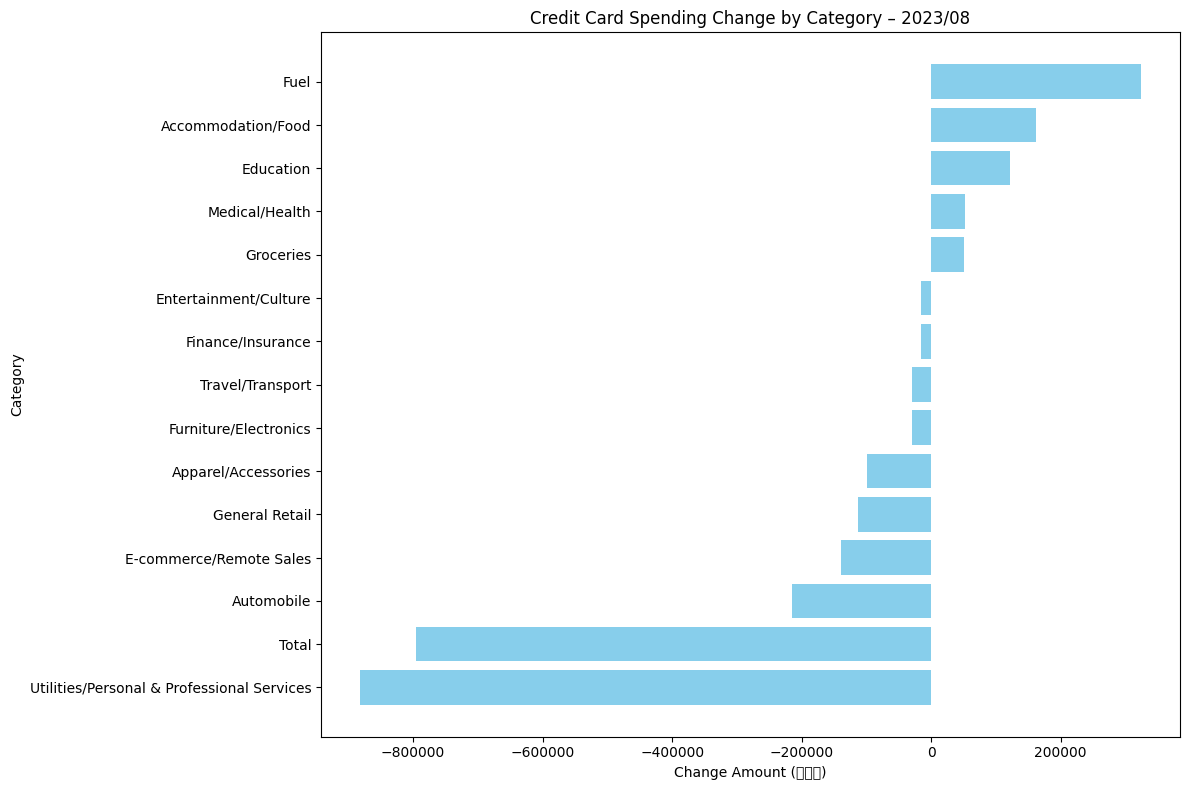

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 최근 월 선택 (예: 2023/08)
latest_month = '2023/08'

# 전국 + 전기대비증감 필터링
increase_df = df[(df['지역코드'] == '전국') & (df['변환'] == '전기대비증감')].copy()

# 소비유형 영어 매핑
increase_df['소비유형_영문'] = increase_df['소비유형코드'].map(category_mapping)

# 매핑되지 않은 항목 제거
increase_df = increase_df[increase_df['소비유형_영문'].notna()]

# 해당 월의 증감값 추출 및 정렬
bar_data = increase_df[[latest_month, '소비유형_영문']].dropna()
bar_data[latest_month] = bar_data[latest_month].apply(lambda x: float(str(x).replace(',', '')))
bar_data = bar_data.sort_values(by=latest_month, ascending=False)

# 📊 막대 그래프
plt.figure(figsize=(12, 8))
plt.barh(bar_data['소비유형_영문'], bar_data[latest_month], color='skyblue')
plt.title(f"Credit Card Spending Change by Category – {latest_month}")
plt.xlabel("Change Amount (백만원)")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


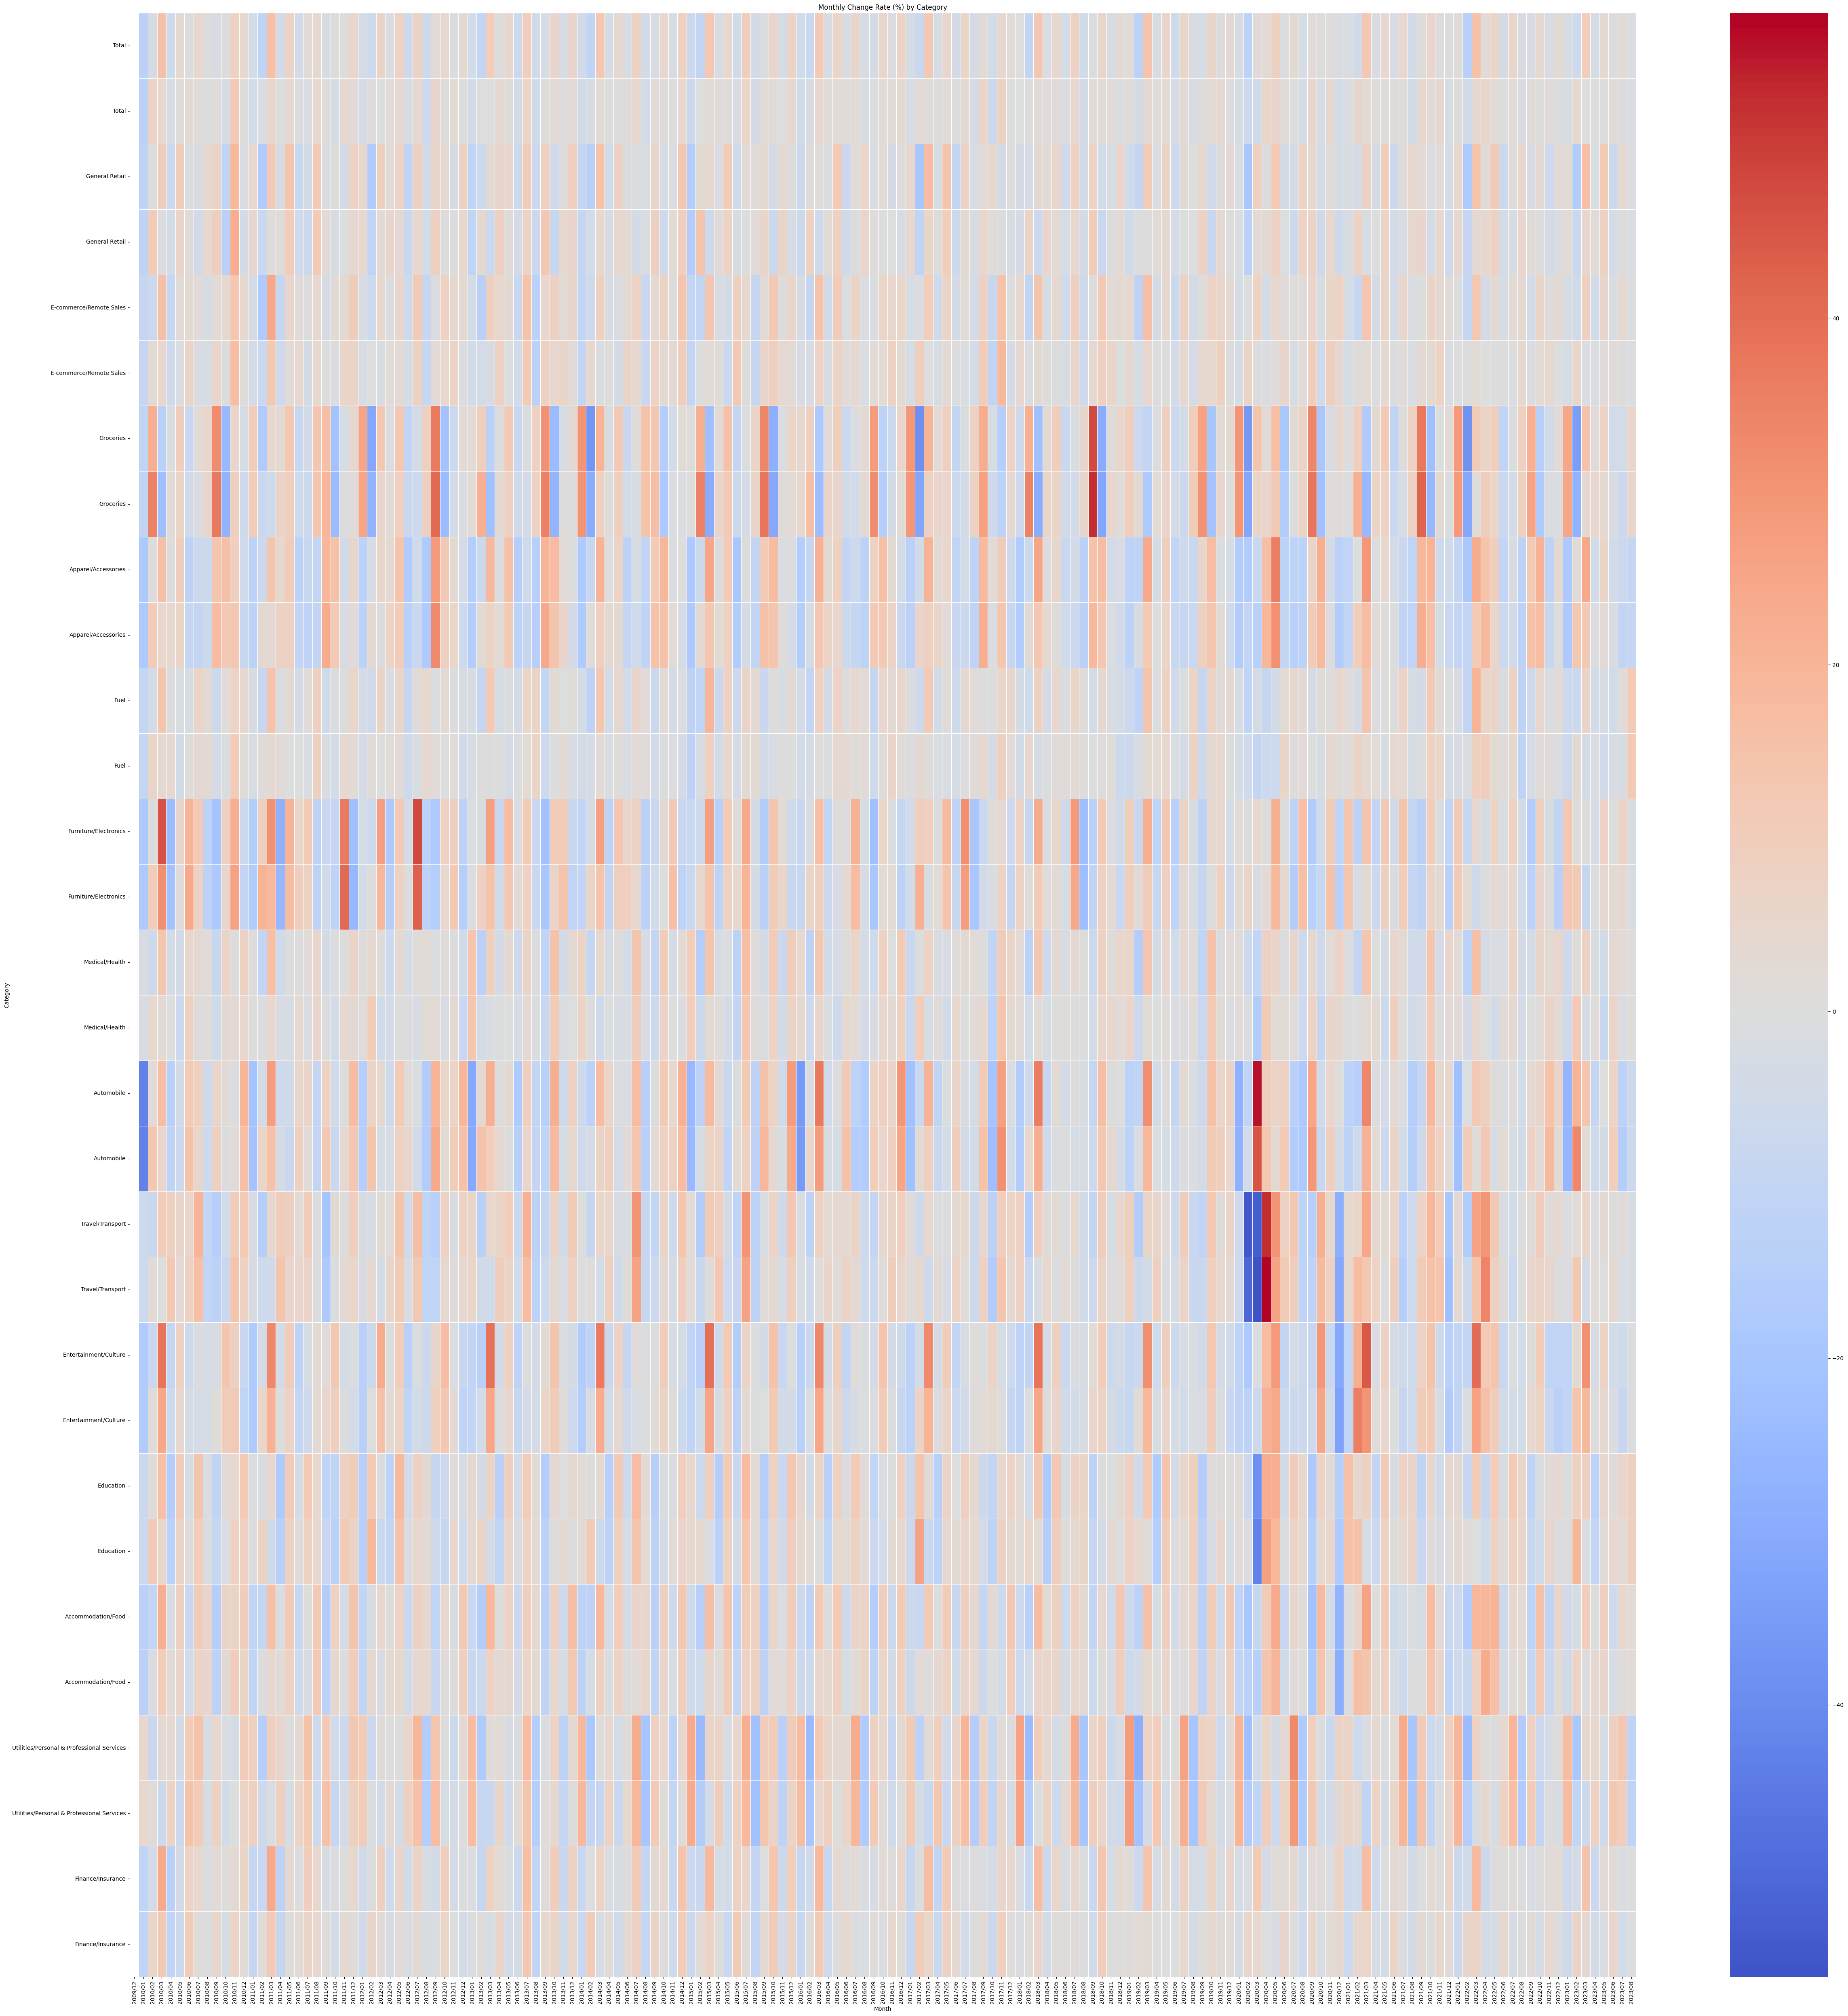

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜 컬럼 추출
date_cols = [col for col in df.columns if '/' in col]

# 전국 + 전기대비증감률 필터링
rate_df = df[(df['지역코드'] == '전국') & (df['변환'] == '전기대비증감률')].copy()

# 소비유형 영어 매핑
rate_df['소비유형_영문'] = rate_df['소비유형코드'].map(category_mapping)

# 매핑되지 않은 항목 제거
rate_df = rate_df[rate_df['소비유형_영문'].notna()].copy()

# 숫자 변환: 쉼표 제거 + float 변환
for col in date_cols:
    rate_df[col] = pd.to_numeric(rate_df[col].astype(str).str.replace(',', ''), errors='coerce')

# 히트맵용 데이터 구성
heatmap_data = rate_df.set_index('소비유형_영문')[date_cols]
heatmap_data = heatmap_data.dropna(how='all')  # 모든 값이 NaN인 행 제거

# 📊 히트맵 시각화
plt.figure(figsize=(50, 50))
sns.heatmap(heatmap_data.astype(float), cmap='coolwarm', center=0, annot=False, fmt=".1f", linewidths=0.5)
plt.title("Monthly Change Rate (%) by Category")
plt.xlabel("Month")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1202284144.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rate_df['Stability_STD'] = rate_df[date_cols].apply(lambda row: pd.to_numeric(row, errors='coerce').std(), axis=1)
/tmp/ipython-input-1202284144.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rate_df['Stability_Score'] = 1 / (rate_df['Stability_STD'] + 1e-6)
/tmp/ipython-input-1202284144.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

     Stability_STD  Popularity_%  Growth_CAGR  Total_Score
2         6.052867      0.133333            0          NaN
10        3.337969      0.133333            0          NaN
18        7.492643     -1.400000            0          NaN
26        6.143324     -1.500000            0          NaN
114       6.957209      0.433333            0          NaN
122       5.126867      0.400000            0          NaN
130      15.876100     -1.300000            0          NaN
138      16.811027     -1.266667            0          NaN
178      12.566606     -7.200000            0          NaN
186      11.320301     -7.133333            0          NaN


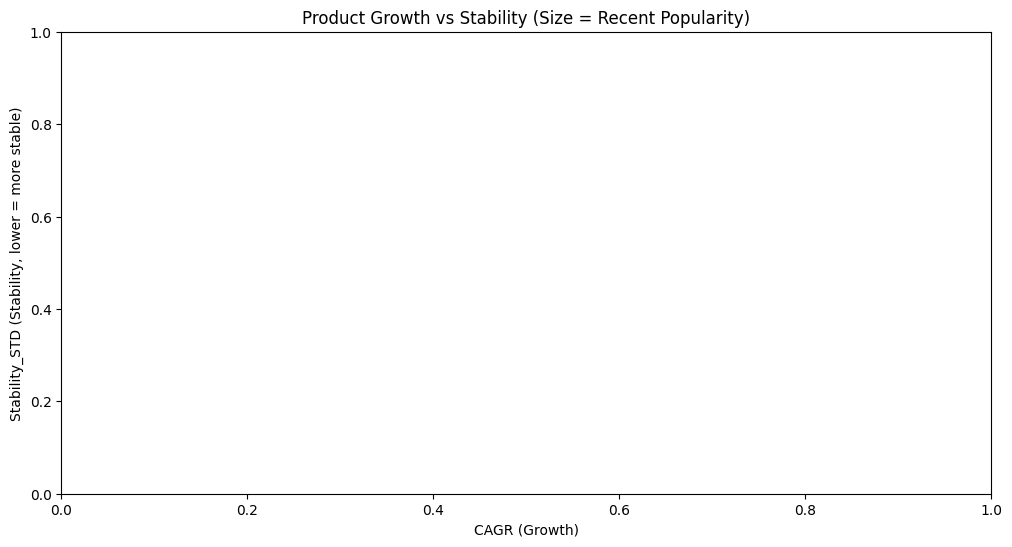

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. 안정성 계산 (증감률 변동성) ---
rate_df['Stability_STD'] = rate_df[date_cols].apply(lambda row: pd.to_numeric(row, errors='coerce').std(), axis=1)
# 안정성 점수: 표준편차가 낮을수록 높게
rate_df['Stability_Score'] = 1 / (rate_df['Stability_STD'] + 1e-6)

# --- 2. 인기 계산 (최근 N개월 평균 증감률) ---
recent_months = date_cols[-3:]  # 최근 3개월
rate_df['Popularity_%'] = rate_df[recent_months].apply(lambda row: pd.to_numeric(row, errors='coerce').mean(), axis=1)
increase_df['Popularity_Δ'] = increase_df[recent_months].apply(lambda row: pd.to_numeric(row, errors='coerce').mean(), axis=1)

# 인기 점수 합산: 증감률 + 증감량
rate_df['Popularity_Score'] = rate_df['Popularity_%'] + increase_df['Popularity_Δ']

# --- 3. 성장성 계산 (CAGR) ---
def calculate_cagr(series):
    series = pd.to_numeric(series, errors='coerce').dropna()
    if len(series) < 2:
        return 0
    start = series.iloc[0]
    end = series.iloc[-1]
    n = len(series) - 1
    if start <= 0 or end <= 0:
        return 0
    return (end / start) ** (1 / n) - 1

rate_df['Growth_CAGR'] = rate_df[date_cols].apply(calculate_cagr, axis=1)
rate_df['Growth_Score'] = rate_df['Growth_CAGR']

# --- 4. 종합 점수 계산 ---
# 가중치: 안정성 0.3, 인기 0.4, 성장 0.3
rate_df['Total_Score'] = (
    0.3*rate_df['Stability_Score'] +
    0.4*rate_df['Popularity_Score'] +
    0.3*rate_df['Growth_Score']
)

# --- 5. 상위 10개 상품 확인 ---
top10 = rate_df.sort_values('Total_Score', ascending=False).head(10)
print(top10[['Stability_STD','Popularity_%','Growth_CAGR','Total_Score']])

# --- 6. 시각화 ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=rate_df,
    x='Growth_CAGR', y='Stability_STD',
    size='Popularity_%', hue='Total_Score', palette='viridis', alpha=0.7, sizes=(50, 300)
)
plt.title('Product Growth vs Stability (Size = Recent Popularity)')
plt.xlabel('CAGR (Growth)')
plt.ylabel('Stability_STD (Stability, lower = more stable)')

plt.show()

In [ ]:
import pandas as pd

# 소비유형 리스트
categories = [
    "식료품", "음식료품 소매", "외식", "의류", "보건의료",
    "교육", "교통", "문화/여가", "가전/가구", "기타 서비스"
]

# 지표 데이터 리스트
stability_std = [8.83, 5.24, 16.81, 11.32, 10.78, 11.77, 12.30, 6.05, 3.34, 7.49]
popularity_pct = [5.10, 0.13, -1.27, -7.13, -3.63, -0.07, 1.53, 0.13, 0.13, -1.40]
growth_cagr = [0] * 10
total_score = [357.67, -196.69, -247.29, -278.43, -282.83, -309.20, -383.36, None, None, None]

# 데이터프레임 생성
df = pd.DataFrame({
    "소비유형": categories,
    "안정성 (Stability_STD)": stability_std,
    "인기 (Popularity_%)": popularity_pct,
    "성장성 (Growth_CAGR)": growth_cagr,
    "종합점수 (Total_Score)": total_score
})

# 보기 좋게 정렬 (예: 종합점수 기준)
df_sorted = df.sort_values(by="종합점수 (Total_Score)", ascending=False)

# 결과 출력
print(df_sorted)
display(df_sorted)

      소비유형  안정성 (Stability_STD)  인기 (Popularity_%)  성장성 (Growth_CAGR)  \
0      식료품                 8.83               5.10                  0   
1  음식료품 소매                 5.24               0.13                  0   
2       외식                16.81              -1.27                  0   
3       의류                11.32              -7.13                  0   
4     보건의료                10.78              -3.63                  0   
5       교육                11.77              -0.07                  0   
6       교통                12.30               1.53                  0   
7    문화/여가                 6.05               0.13                  0   
8    가전/가구                 3.34               0.13                  0   
9   기타 서비스                 7.49              -1.40                  0   

   종합점수 (Total_Score)  
0              357.67  
1             -196.69  
2             -247.29  
3             -278.43  
4             -282.83  
5             -309.20  
6             -383.36  
7   

,소비유형,안정성 (Stability_STD),인기 (Popularity_%),성장성 (Growth_CAGR),종합점수 (Total_Score)
0,식료품,8.83,5.10,0,357.67
1,음식료품 소매,5.24,0.13,0,-196.69
2,외식,16.81,-1.27,0,-247.29
3,의류,11.32,-7.13,0,-278.43
4,보건의료,10.78,-3.63,0,-282.83
5,교육,11.77,-0.07,0,-309.20
6,교통,12.30,1.53,0,-383.36
7,문화/여가,6.05,0.13,0,NaN
8,가전/가구,3.34,0.13,0,NaN
9,기타 서비스,7.49,-1.40,0,NaN


In [ ]:
print(rate_df[['소비유형_영문', 'Growth_CAGR']].head(10))


                     소비유형_영문  Growth_CAGR
2                      Total            0
10                     Total            0
18            General Retail            0
26            General Retail            0
114  E-commerce/Remote Sales            0
122  E-commerce/Remote Sales            0
130                Groceries            0
138                Groceries            0
178      Apparel/Accessories            0
186      Apparel/Accessories            0


In [ ]:
# 날짜 컬럼 추출
date_cols = [col for col in df.columns if '/' in col]


# 소비유형 영어 매핑
rate_df['소비유형_영문'] = rate_df['소비유형코드'].map(category_mapping)

# 매핑되지 않은 항목 제거
rate_df = rate_df[rate_df['소비유형_영문'].notna()].copy()

# 숫자 변환: 쉼표 제거 + float 변환
for col in date_cols:
    rate_df[col] = pd.to_numeric(rate_df[col].astype(str).str.replace(',', ''), errors='coerce')
